# **Data Inspection**

## Objectives

* Clean data
* Produce the train and test sets with the cleaned data

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* Train and Test sets, saved in outputs/datasets/cleaned

## Crisp-DM

* Data Preparation


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/house-prices-ml/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/house-prices-ml'

# Load Data

Load data and display head to check that it has been loaded.

In [4]:
import pandas as pd
df_sales = pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
df_inherited = pd.read_csv("outputs/datasets/collection/inherited_houses.csv")
print("Sales Data")
print(df_sales.shape)
df_sales.head()



Sales Data
(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [5]:
print("Inherited Houses")
df_inherited.head()

Inherited Houses


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


---

# Data Cleaning

First we will check the distribution of data from variables with missing data.

In [6]:
vars_with_missing_data = df_sales.columns[df_sales.isna().sum() > 0].to_list()
vars_with_missing_data


['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

Now we will look at some of the data contained within these variables to assess the data types.

In [7]:
df_sales.filter(vars_with_missing_data).info

<bound method DataFrame.info of       2ndFlrSF  BedroomAbvGr BsmtExposure BsmtFinType1  EnclosedPorch  \
0        854.0           3.0           No          GLQ            0.0   
1          0.0           3.0           Gd          ALQ            NaN   
2        866.0           3.0           Mn          GLQ            0.0   
3          NaN           NaN           No          ALQ            NaN   
4          NaN           4.0           Av          GLQ            0.0   
...        ...           ...          ...          ...            ...   
1455     694.0           3.0           No          Unf            NaN   
1456       0.0           NaN           No          ALQ            NaN   
1457    1152.0           4.0           No          GLQ            NaN   
1458       0.0           2.0           Mn          NaN          112.0   
1459       0.0           3.0           No          BLQ            0.0   

     GarageFinish  GarageYrBlt  LotFrontage  MasVnrArea  WoodDeckSF  
0             RFn    

Review the missing data.

In [8]:
def EvaluateMissingData(df):
    """
    Function to evaluate data with missing values.
    Source: Taken from The Code institute Churnometer walkthrough
    project. 
    """
    missing_data_absolute = df_sales.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df_sales)*100, 2)
    df_missing_data = (pd.DataFrame(
                      data={"RowsWithMissingData": missing_data_absolute,
                            "PercentageOfDataset": missing_data_percentage,
                            "DataType": df_sales.dtypes}
                              ).sort_values(
                                  by=['PercentageOfDataset'], ascending=False
                                  ).query("PercentageOfDataset > 0"))

    return df_missing_data


df_missing_data = EvaluateMissingData(df_sales)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 10 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


The table shows a sizeable amount of missing data that we need to deal with as part of the data cleaning process.  We will aim to impute values or categories into all of these columns and leave no missing data.
Each variable will be considered individually and am imitial decision for how to impute the missing data will be taken based on observations and interpretations of the data. We will then compare the distributions of the imputed data with the original data and ensure we have not affected it.
The Pandas profiling report in the DataInpection notebook will also be used in the analysis.

We are dealing with the following variables:
* Numerical Variables: Enclosed Porch, WoodDeskSF, LotFrontage, BedroomAbvGr, 2ndFlrSF, GarageYrBlt, MasVnrArea.
* Categorical Variables: GarageFinish, BsmtFinType1, BasmntExposure

## Numerical Variables

### EnclosedPorch
According to our Pandas Profile report 90.68% of the data is missing and 7.9% is zeros. It is safe to assume that missing data is representative of the fact that there is no enclosed porch at the property. Therefore it is reasonable to insert a value of zero and use this potentially valuable information.

Conclusion: We will impute a value of zero into the missing data. 

### WoodDeckSF
89% of the data is missing and 5.3% is zeroes. Again, as this variable relates to a specific feature of the property, it is safe to assume that a missing value means the feature is not present. Therefore missing data is equivalent to a zero value.

Conclusion: We will impute a value of zero into the missing data.

### LotFrontage
This variable gives us the linear feet of street connected to property. 17.74% of the data is missing. There is no reliable evidence or indication as to why this data is missing so it would be wrong to make any assumptions about it. The data is normally distributed so using the median value is a sensible approach to avoid distorting the data we do have.

Conclusion: We will impute the median value
 
### BedroomAbvGr:
The number of bedrooms above ground level is shown to reflect a normal distribution. Only 6.8% of data is missing, therefore to avoid distorting the data we can take median value to fill the missing data.

Conclusion: We will impute the median value

### 2ndFlrSF:
Second-floor square feet is a normally distributed variable, outside of the 53.5% of values which are zero. We will take the median value to fill the missing data.

Conclusion: We will impute the median value

### GarageYrBlt:
The year the garage was built is missing 5.5% of the data. Even if this was reflective of no garage at all in these properties, there is no way to impute a value to give this information.  Therefore, our approach will be to impute the median value to avoid skewing the data that we do have.

Conclusion: We will impute the median value

### MasVnrArea:

Masonry veneer area in square feet. Only 8 properties (0.55%) of them have missing data, whereas 861 have a zero value. It is reasonable to assume that missing data is equivalent to a zero value.

Conclusion:  We will impute a value of zero into the missing data.


## Categorical Variables: 

### GarageFinish
Here there are only three values present in the dataset, but a value of "None" is permitted and means that the property has no Garage. This is reasonable to assume and therefore we will take the approach to use a value of "None".

Conclusion: A category of “none” will be assigned where there is missing data.

### BsmtFinType1
A missing value here could be representative of no basement. 9.9% of the data is missing and so we will take the approach to fill with the value "none".

Conclusion: A category of “none” will be assigned where there is missing data.

### BasmntExposure
953 properties (67%) already have the most common category of "no" meaning no exposure. However, this variable has a permitted value of "None" (meaning no basement) which no properties currently have. In agreement with the client, the missing data will be taken to represents no basement and we will use a value of "none".

Conclusion: A category of “none” will be assigned where there is missing data.


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        ##df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        ##df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        ##dfAux = pd.concat([df1, df2], axis=0)
        df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var]}).reset_index(drop=True)
        df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_cleaned[var]}).reset_index(drop=True)
        dfAux = pd.concat([df1, df2], axis=0).reset_index(drop=True)  # Reset index after concatenation
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

Arbitrary Number Imputer


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['EnclosedPorch', 'MasVnrArea', 'WoodDeckSF'] 




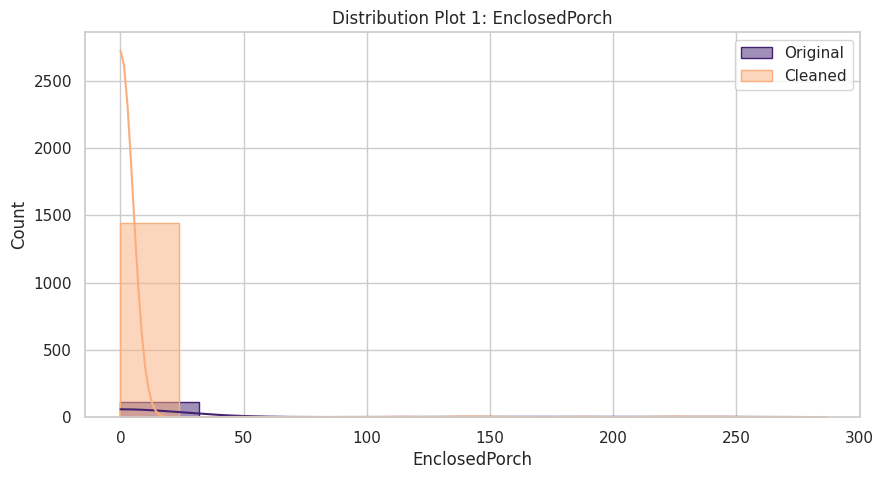

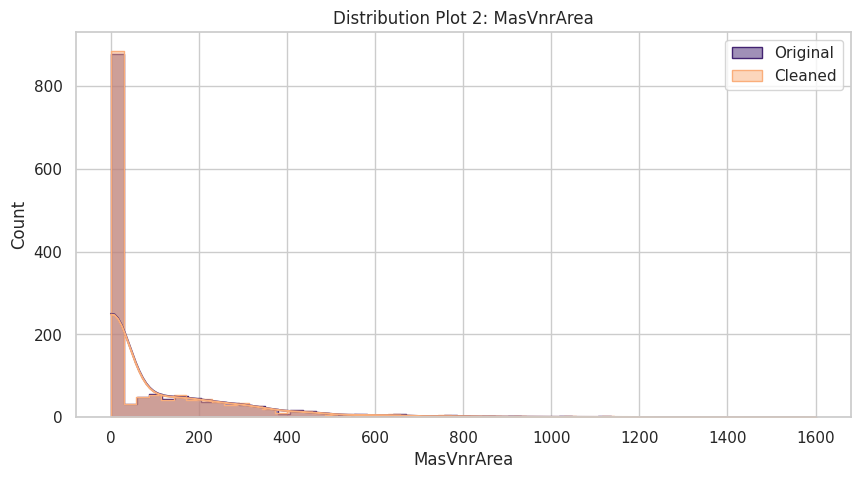

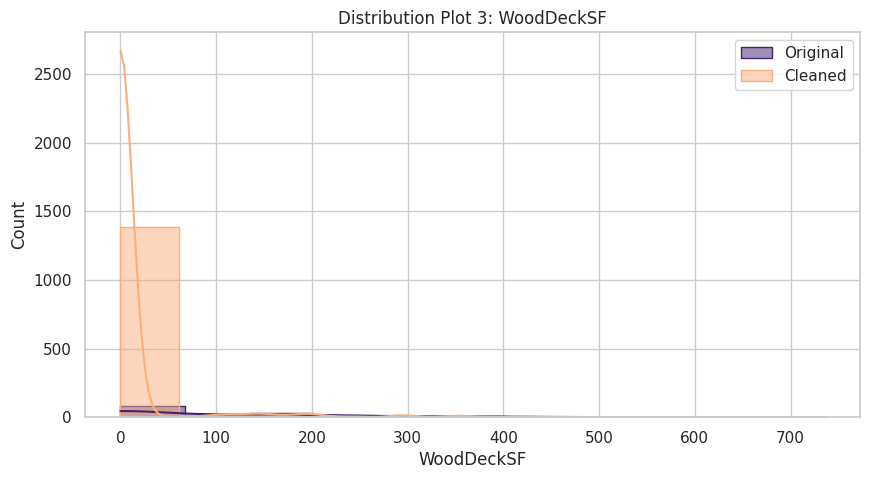

* There are 10 variables with missing data in the cleaned dataset



,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


In [10]:
from feature_engine.imputation import ArbitraryNumberImputer

variables_method = ['EnclosedPorch', 'MasVnrArea', 'WoodDeckSF']
variables_method

imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=variables_method)

df_method = imputer.fit_transform(df_sales)

DataCleaningEffect(df_original=df_sales,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_method)

df_missing_data = EvaluateMissingData(df_method)
print(f"* There are {df_missing_data.shape[0]} variables with missing data in the cleaned dataset\n")
df_missing_data


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['GarageFinish', 'BsmtFinType1', 'BsmtExposure'] 




/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


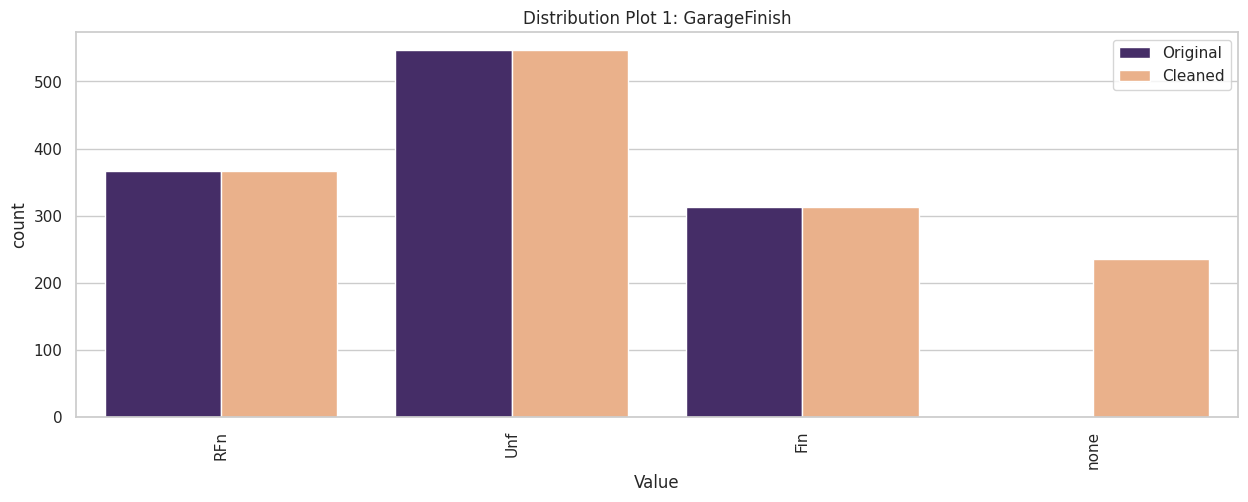

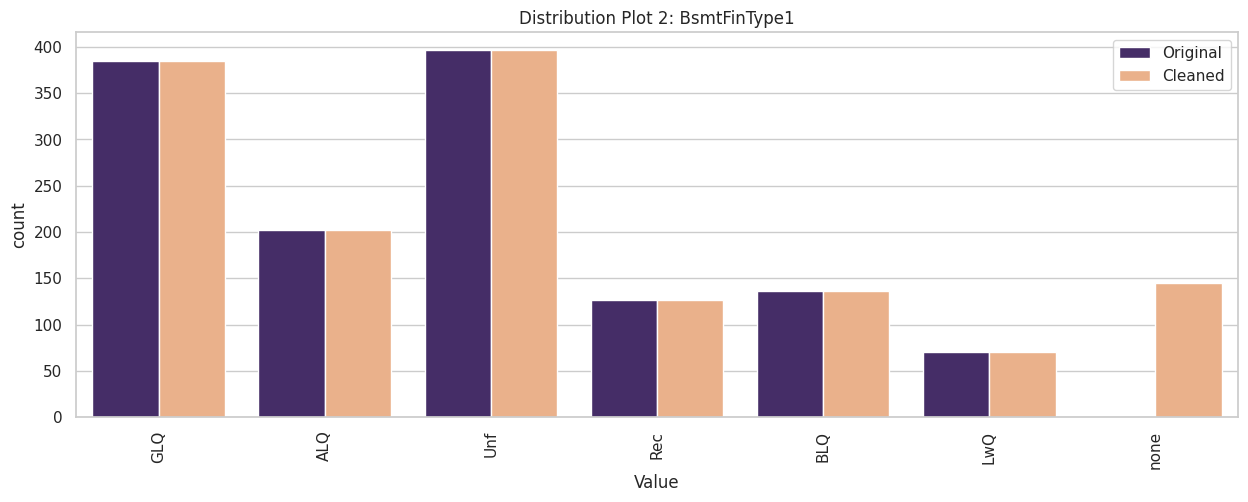

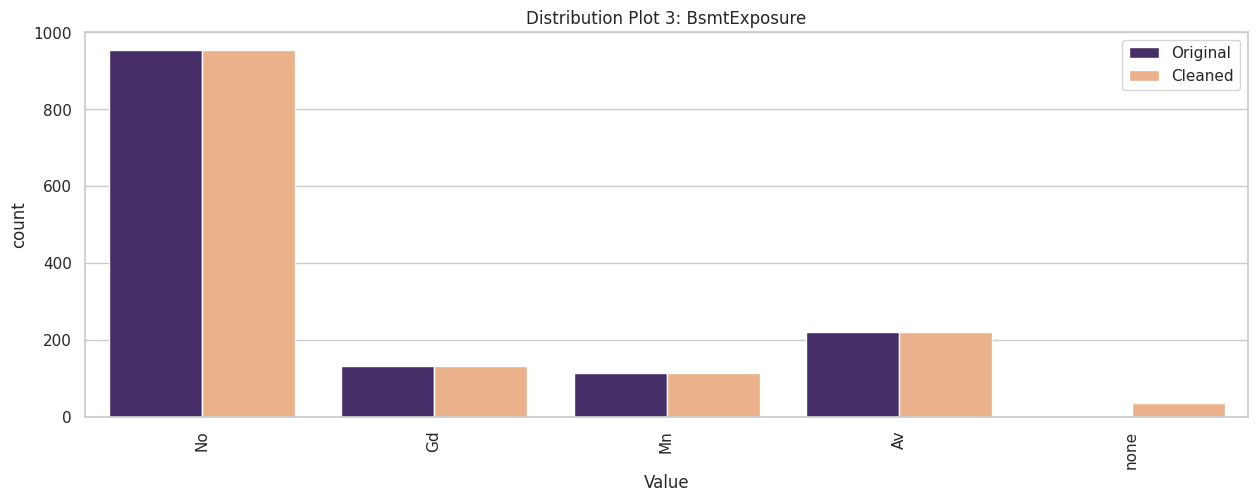

In [11]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish', 'BsmtFinType1', 'BsmtExposure']
variables_categorical

imputer = CategoricalImputer(imputation_method='missing', fill_value='none', variables=variables_categorical)

df_method = imputer.fit_transform(df_sales)

DataCleaningEffect(df_original=df_sales, df_cleaned=df_method, variables_applied_with_method=variables_categorical)


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage', '2ndFlrSF'] 




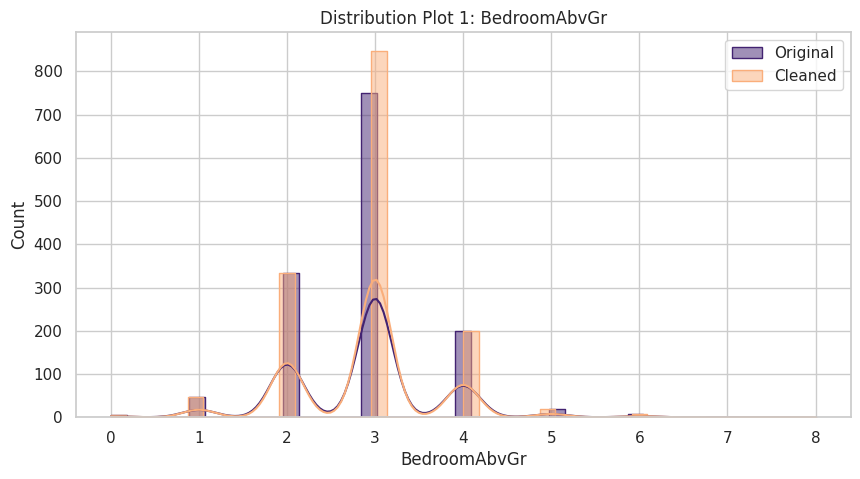

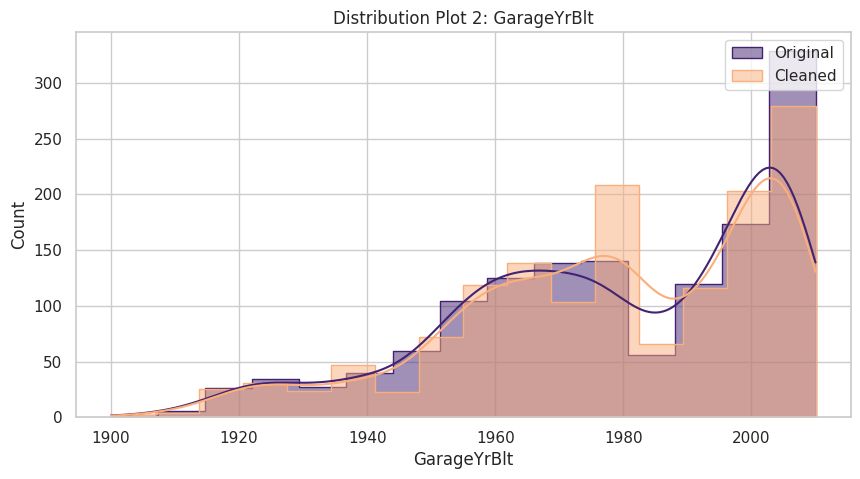

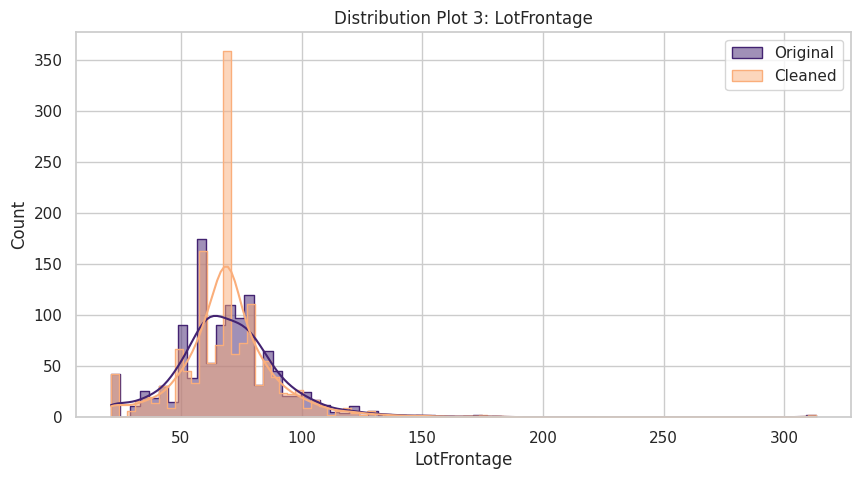

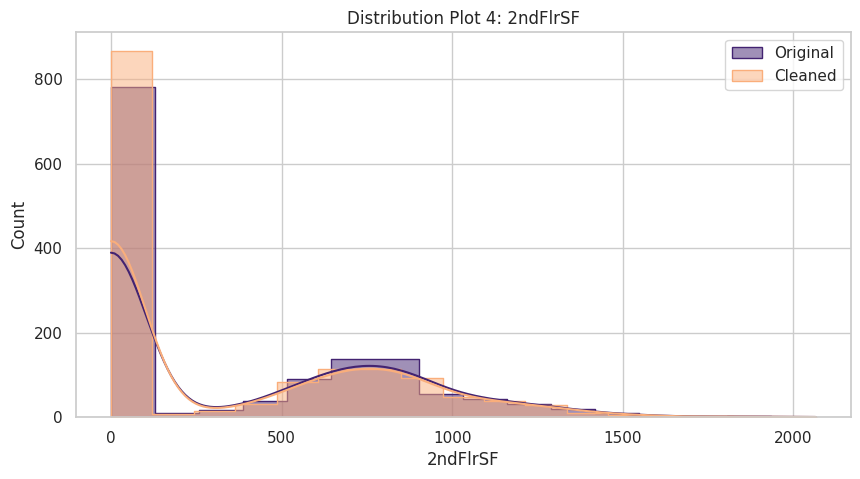

In [12]:

from feature_engine.imputation import MeanMedianImputer

variables_method = ['BedroomAbvGr' , 'GarageYrBlt', 'LotFrontage', '2ndFlrSF']
variables_method

imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)

df_method = imputer.fit_transform(df_sales)

DataCleaningEffect(df_original=df_sales,
                  df_cleaned=df_method,
                  variables_applied_with_method=variables_method)

---

## Test and Train Sets

Now we will separate the dataset into a train (80%) and test (20%) set.

In [13]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df_sales,
                                        df_sales['SalePrice'],
                                        test_size=0.2,
                                        random_state=3)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")


TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


## Apply data cleaning methods to the datasets

In [14]:
from feature_engine.imputation import ArbitraryNumberImputer
variables_method = ['EnclosedPorch', 'MasVnrArea', 'WoodDeckSF']
imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=variables_method)
imputer.fit_transform(TrainSet)

# Apply the transformation to both the train and test sets
TrainSet = imputer.transform(TrainSet)
TestSet = imputer.transform(TestSet)

print(TrainSet.info())
print(TestSet.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 727 to 1273
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1168 non-null   int64  
 1   2ndFlrSF       1095 non-null   float64
 2   BedroomAbvGr   1087 non-null   float64
 3   BsmtExposure   1134 non-null   object 
 4   BsmtFinSF1     1168 non-null   int64  
 5   BsmtFinType1   1052 non-null   object 
 6   BsmtUnfSF      1168 non-null   int64  
 7   EnclosedPorch  1168 non-null   float64
 8   GarageArea     1168 non-null   int64  
 9   GarageFinish   977 non-null    object 
 10  GarageYrBlt    1107 non-null   float64
 11  GrLivArea      1168 non-null   int64  
 12  KitchenQual    1168 non-null   object 
 13  LotArea        1168 non-null   int64  
 14  LotFrontage    954 non-null    float64
 15  MasVnrArea     1168 non-null   float64
 16  OpenPorchSF    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  OverallQual

In [15]:
from feature_engine.imputation import CategoricalImputer
variables_method = ['GarageFinish', 'BsmtFinType1', 'BsmtExposure']
imputer = CategoricalImputer(imputation_method='missing', fill_value='none', variables=variables_method)

imputer.fit_transform(TrainSet)

# Apply the transformation to both the train and test sets
TrainSet = imputer.transform(TrainSet)
TestSet = imputer.transform(TestSet)

print(TrainSet.info())
print(TestSet.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 727 to 1273
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1168 non-null   int64  
 1   2ndFlrSF       1095 non-null   float64
 2   BedroomAbvGr   1087 non-null   float64
 3   BsmtExposure   1168 non-null   object 
 4   BsmtFinSF1     1168 non-null   int64  
 5   BsmtFinType1   1168 non-null   object 
 6   BsmtUnfSF      1168 non-null   int64  
 7   EnclosedPorch  1168 non-null   float64
 8   GarageArea     1168 non-null   int64  
 9   GarageFinish   1168 non-null   object 
 10  GarageYrBlt    1107 non-null   float64
 11  GrLivArea      1168 non-null   int64  
 12  KitchenQual    1168 non-null   object 
 13  LotArea        1168 non-null   int64  
 14  LotFrontage    954 non-null    float64
 15  MasVnrArea     1168 non-null   float64
 16  OpenPorchSF    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  OverallQual

/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):
/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):
/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


In [16]:
from feature_engine.imputation import MeanMedianImputer
variables_method = ['BedroomAbvGr' , 'GarageYrBlt', 'LotFrontage', '2ndFlrSF']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)

imputer.fit_transform(TrainSet)

# Apply the transformation to both the train and test sets
TrainSet = imputer.transform(TrainSet)
TestSet = imputer.transform(TestSet)

print(TrainSet.info())
print(TestSet.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 727 to 1273
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1168 non-null   int64  
 1   2ndFlrSF       1168 non-null   float64
 2   BedroomAbvGr   1168 non-null   float64
 3   BsmtExposure   1168 non-null   object 
 4   BsmtFinSF1     1168 non-null   int64  
 5   BsmtFinType1   1168 non-null   object 
 6   BsmtUnfSF      1168 non-null   int64  
 7   EnclosedPorch  1168 non-null   float64
 8   GarageArea     1168 non-null   int64  
 9   GarageFinish   1168 non-null   object 
 10  GarageYrBlt    1168 non-null   float64
 11  GrLivArea      1168 non-null   int64  
 12  KitchenQual    1168 non-null   object 
 13  LotArea        1168 non-null   int64  
 14  LotFrontage    1168 non-null   float64
 15  MasVnrArea     1168 non-null   float64
 16  OpenPorchSF    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  OverallQual

## Save cleaned datasets

In [22]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') 
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


In [27]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

In [28]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

In [29]:
FullSet = pd.concat([TestSet, TrainSet], ignore_index=True)
FullSet.to_csv("outputs/datasets/cleaned/FullSetCleaned.csv", index=False)